In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import os

In [12]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [13]:
def model_train(model, x, y):
    max_epoch = 2000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    grad_arr = []
    while not_converged:
        epoch += 1
        prediction = model(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad() #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        optimizer.step()
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())

        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5

        grad_arr.append(grad_norm)

        if epoch % 100 == 0:
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')

        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False

    return epoch_arr, loss_arr, prediction, grad_arr

In [14]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
print(x.shape)
y = np.sinc(5*x)
print(y.shape)

(300, 1)
(300, 1)


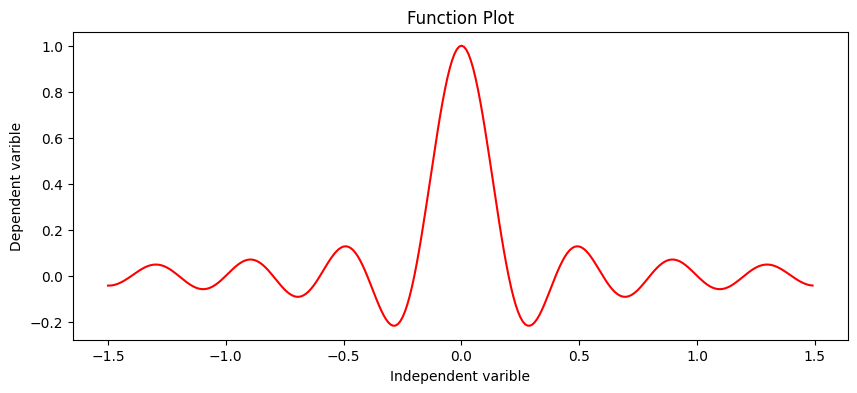

In [15]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Function Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

In [22]:
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.linear8 = nn.Linear(5, 5)
        self.predict = nn.Linear(5, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))
        x = nn.functional.leaky_relu(self.linear8(x))

        x = self.predict(x)
        return x

model_1 = Model1()


In [23]:
optimizer = torch.optim.Adam(model_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction, m1_grad_arr = model_train(model_1, x, y)

601
epoch: 100, loss = 0.1076
epoch: 200, loss = 0.0607
epoch: 300, loss = 0.0490
epoch: 400, loss = 0.0057
epoch: 500, loss = 0.0050
epoch: 600, loss = 0.0038
epoch: 700, loss = 0.0031
epoch: 800, loss = 0.0027
epoch: 900, loss = 0.0025
epoch: 1000, loss = 0.0024
epoch: 1100, loss = 0.0023
epoch: 1200, loss = 0.0022
epoch: 1300, loss = 0.0021
epoch: 1400, loss = 0.0021
epoch: 1500, loss = 0.0019
epoch: 1600, loss = 0.0017
epoch: 1700, loss = 0.0015
epoch: 1800, loss = 0.0014
epoch: 1900, loss = 0.0013
epoch: 2000, loss = 0.0013
Max Epoch Reached


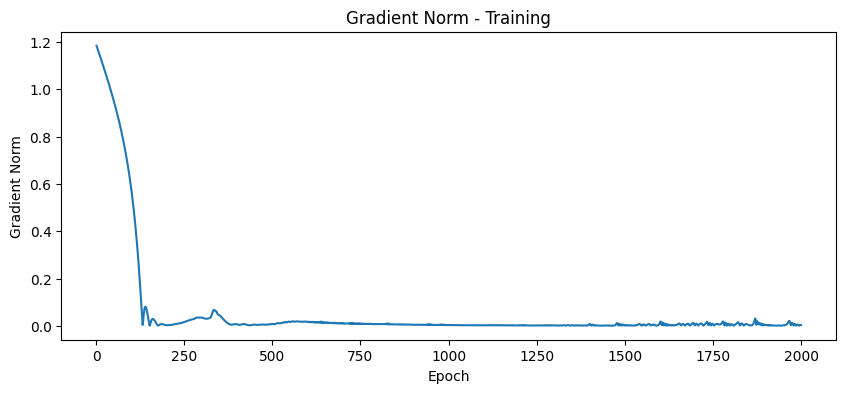

In [24]:
plt.figure(figsize=(10,4))
plt.plot(m1_epoch_arr, m1_grad_arr)
plt.title('Gradient Norm - Training')
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.show()

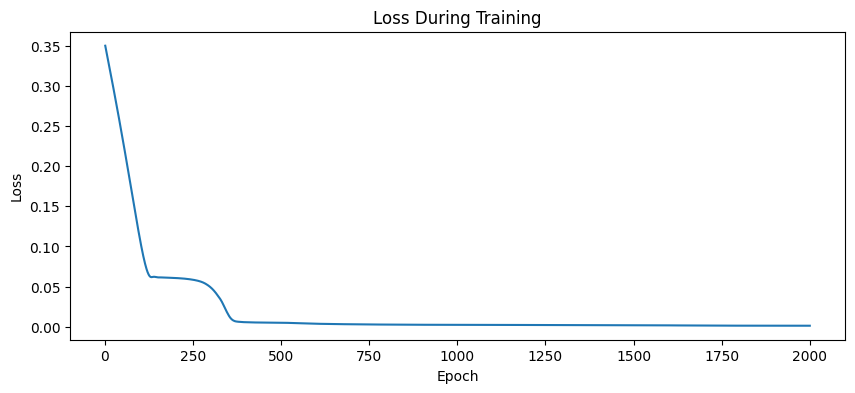

In [25]:
plt.figure(figsize=(10,4))
plt.plot(m1_epoch_arr, m1_loss_arr)
plt.title('Loss During Training')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

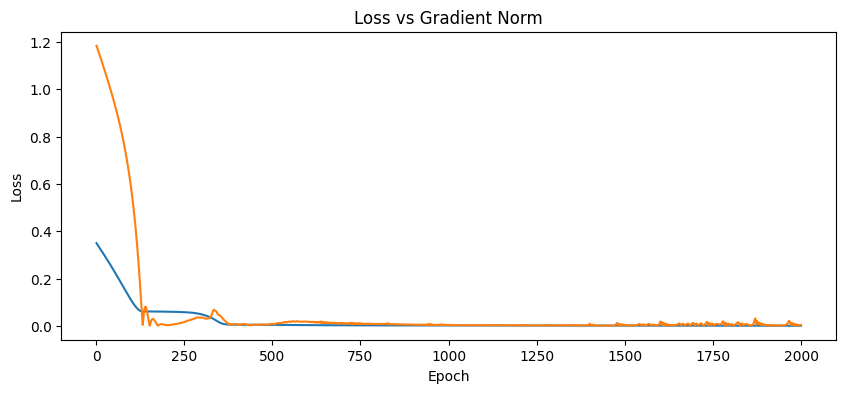

In [26]:
plt.figure(figsize=(10,4))
plt.plot(m1_epoch_arr, m1_loss_arr)
plt.plot(m1_epoch_arr, m1_grad_arr)
plt.title('Loss vs Gradient Norm')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()